# 주성분 분석 (PCA)
다차원 데이터의 차원을 축소하면서 데이터의 주요한 패턴을 추출하는 비지도 학습 알고리즘. 주요 목적은 데이터를 더 낮은 차원으로 표현함으로써 데이터의 복잡성을 감소시키고, 변수 간의 상관 관계 및 패턴을 파악하는 것
- 차원 축소 : 다차원 데이터는 여러 변수로 구성되어 있다. 하지만 이 변수들은 종종 상호 연관성을 가지고 이써나 중복되는 정보를 포함할 수 있다. PCA는 이러한 다차원 데이터를 고차원 공간에서 저차원 공간으로 변환해 데이터의 중요한 특징과 변동성을 유지하면서 차원을 줄인다. 이를 통해 데이터의 표현이 더 간결하고 해석하기 쉽게 된다.
- 주성분 추출 : 데이터의 분산을 최대로 보존하는 방향, 즉 주성분을 찾는다. 주성분은 원본 데이터의 변동성을 가장 잘 설명하는 변수들의 선형 조합이다. 첫 번째 주성분은 데이터의 가장 큰 분산을 가지며, 이후의 주성분들은 변동성이 점차 감소한다. 주성분은 원본 변수들과는 독립적인 새로운 축으로, 데이터를 새로운 공간으로 투영하게 된다.
- 정보 유실 최소화 : PCA는 차원 축소를 통해 데이터 정보를 최대한 보존하려고 한다. 상대적으로 작은 주성분으로도 데이터의 주요 특징을 잘 표현할 수 있어서, 데이터를 저차원으로 표현함으로써 정보 유실을 최소화하면서도 계산 및 시각화의 효율성을 높일 수 있다.

## PCA : 데이터 전처리
- 변수 스케일링 : 변수들 간에 크기 차이가 클 경우, PCA는 크기가 큰 변수에 더 큰 가중치를 부여할 수 있다. 이는 결과에 편향을 일으킬 수 있으며, 차원 축소의 목적을 왜곡시킬 수 있다. 따라서 모든 변수를 동등한 크기로 조장하는 것이 중요하다.
- 변수 상관 관계 : 상관 관계가 큰 변수들이 존재할 경우, PCA는 이러한 변수들을 중요한 주성분으로 인식할 수 있다. (데이터 변수들 간의 상관 관계에 기반해 주성분을 추출하기 때문) 따라서 데이터를 전처리해 상관 관계를 줄이는 것이 중요
- 이상치 처리
- 결측치 처리


### 전처리 방법
정규화와 표준화가 가장 일반적으로 사용되는 방법. 데이터의 범위를 [0,1] 또는 [-1,1]로 조정하는 방법. 데이터의 상대적인 크기를 비교하기 위해 사용된다. 가장 일반적인 정규화 방법은 Min-Max 정규화.(데이터셋의 Min을 0으로, Max를 1로 설정해 모든 값들을 해당 범위로 조정) <br>
정규화 된 값 = (원본 값 - 최솟값)/(최댓값 - 최솟값)<br>
이 외에도 Z-score 정규화, 소수 정규화 등 다양한 정규화 방법이 있음<br>
표준화는 데이터의 평균을 0으로, 표준편차를 1로 조정하는 방법. 데이터의 분포를 표준 정규 분포로 변환하여 데이터의 상대적인 위치를 비교하기 위해 사용됨<br>
표준화 된 값 = (원본 값 - 평균) / 표준편차

## 공분산 행렬과 PCA
공분산 행렬은 PCA에 중요한 역할을 한다. 아래는 활용 예시
1. 공분산 행렬 계산
2.  고유값과 고유벡터 계산
3. 주성분 선택
4. 데이터 투영
5. 차원 축소

### 고유값과 고유벡터
- 고유값 : 정방행렬에 대해서 정의되는 값. 고유벡터를 행렬에 곱하면 스칼라 값인 고유값의 상수배가 되는 식이 성립한다면 (A * v = λ * v) 해당행렬과 고유벡터 사이의 관계를 나타냄 즉, 행렬 A에 고유값을 곱한 결과는 해당 고유벡터를 상수배한 것과 동일하다. 이러한 관계에서 고유벡터는 행렬 A에 대해 방향을 유지하는 특성을 가지며, 고유값을 해당 방향의 크기를 결정함

주성분의 설명력 :  [0.40489785 0.32029192]
주성분의 가중치 : 
 [[ 0.64331171  0.37444715  0.66778692]
 [ 0.03203542  0.8583057  -0.51213774]]


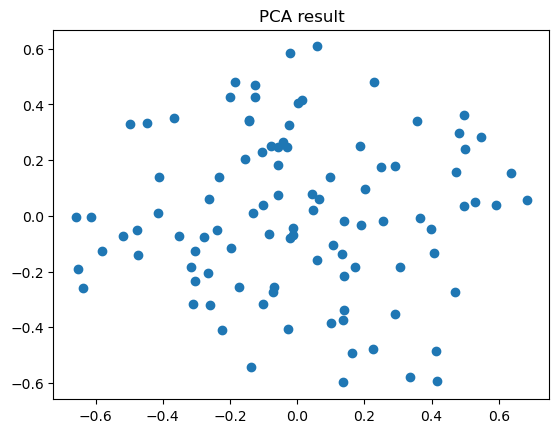

In [2]:
# Python과 scikit-learn 라이브러리를 사용하여 PCA 실습
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 예제 데이터 생성
X = np.random.rand(100, 3)   # 100개의 샘플과 3개의 변수로 구성된 데이터

# PCA 모델 생성 및 적합
pca = PCA(n_components=2)   # 주성분을 2개로 설정
pca.fit(X)

# 변환된 데이터
transformed_data = pca.transform(X)

# 주성분의 설명력 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분의 설명력 : ", explained_variance_ratio)

# 주성분의 가중치 확인
components = pca.components_
print("주성분의 가중치 : \n", components)

# 변환된 데이터 시각화
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('PCA result')
plt.show()

### 산점도 그래프 해석
- 상관 관계 파악 : 변수들이 어떻게 분포되어 있는지 확인. 변수들이 양의 상관 관계를 가지면 데이터가 오른쪽 위로 향하는 방향으로 분포하게 된다. 음의 상관관계를 가지면 데이터가 왼쪽 위로 향하는 방향으로 분포하게 된다. 두 변수 사이에 선형적인 관계가 있는 경우, 산점도 그래프 상에서 포인트들이 추세선 주위에 집중되어 있을 것이다.
- 이상치 탐지
- 클러스터링과 패턴 탐색 : 클러스터링은 비슷한 특성을 가지는 데이터들이 서로 군집을 이루는 현상을 의미함. 산점도를 통해 클러스터 간의 구분이나 내부 패턴 탐색 가능
- 변수의 범위 파악

## PCA의 장단점
### PCA의 장점
- 차원 축소
- 변수 선택
- 다중공선성 해결
- 데이터 시각화
### PCA의 한계
- 선형 가정
- 정보 손실
- 해석의 어려움
- 이상치에 민감